In [46]:
from pathlib import Path
from music_data_analysis import Dataset





In [47]:

import numpy as np

def calculate_loss(x:list[int]):
    loss = 0
    for i in x:
        for j in x:
            loss += (i-j)**2
    return loss / len(x)**2

def optimal_two_groups(x:list[int]):
    '''
    Separate x into two groups, minimize the sqare difference between the sum of each group
    '''
    n = len(x)
    x = sorted(x)

    min_loss = np.inf
    best_sep = 0
    for sep in range(n-1):
        left = x[:sep+1]
        right = x[sep+1:]
        loss = calculate_loss(left) + calculate_loss(right)
        if loss < 0:
            loss = -loss
        if loss < min_loss:
            min_loss = loss

            best_sep = sep

    return x[:best_sep+1], x[best_sep+1:]


In [59]:
from numpy import mean


dataset = Dataset(Path("./data"))
song = dataset.get_song('9')
pr = song.read_pianoroll('pianoroll')

def reduce(pitches):
    if len(pitches) == 0:
        return None
    return mean(pitches)
    
def fill_out(pitches):
    first_non_nulls = []

    for pitch in pitches:
        if pitch is not None:
            first_non_nulls.append(pitch)
            if len(first_non_nulls) == 2:
                break

    if len(first_non_nulls) == 0:
        latest_pitch = 60
    else:
        latest_pitch = mean(first_non_nulls)

    for i, pitch in enumerate(pitches):
        if pitch is None:
            pitches[i] = latest_pitch
        else:
            latest_pitch = pitch

    return pitches


pitch_low = []
pitch_high = []


for bar in pr.iter_over_bars():
    pitches = [note.pitch for note in bar]
    low, high = optimal_two_groups(pitches)

    pitch_low.append(reduce(low))
    pitch_high.append(reduce(high))

# fill out the Nones
pitch_low = fill_out(pitch_low)
pitch_high = fill_out(pitch_high)



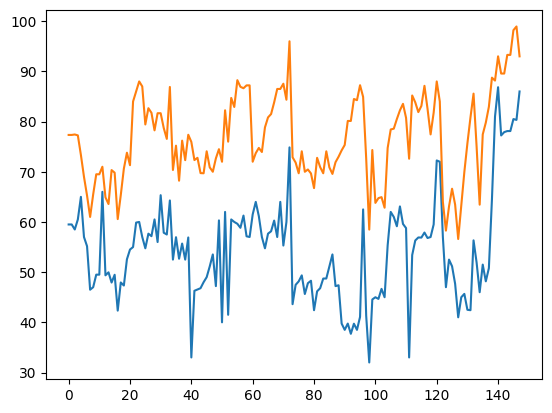

In [60]:
import matplotlib.pyplot as plt
plt.plot(pitch_low)
plt.plot(pitch_high)

In [54]:
pitch_low

[84, 88, 93]

In [ ]:
import music21


music21.me

In [5]:
from itertools import chain
from tqdm import tqdm
import multiprocessing
from pathlib import Path
from beat_this.inference import File2Beats

file2beats = File2Beats(device="cuda", dbn=True)
def process_songs(input_dir: Path, output_dir: Path, audio_dir: Path = Path('./audio')):
    output_dir.mkdir(exist_ok=True)
    # for input_midi_file in tqdm(chain(input_dir.glob('*.mid'),input_dir.glob('*.midi'))):
    #     output_midi_file = output_dir / input_midi_file.name
    #     process_song(input_midi_file, output_midi_file, audio_dir)

    n_shards = 10
    input_files = list(chain(input_dir.glob('*.mid'),input_dir.glob('*.midi')))
    input_files = [input_files[i::n_shards] for i in range(n_shards)]
    output_files = [output_dir / f'{i}.mid' for i in range(n_shards)]
    audio_dirs = [audio_dir for i in range(n_shards)]
    with multiprocessing.Pool(n_shards) as p:
        p.starmap(process_songs_shard, zip(input_files, output_files, audio_dirs))
        

In [6]:
if __name__ == '__main__':
    process_songs(Path('./midi'), Path('./processed_midi'))

  0%|          | 0/7 [00:00<?, ?it/s]

In [5]:
from miditoolkit import MidiFile

In [9]:
from chorder import Dechorder
midi_obj = MidiFile('data/synced_midi/9.mid')
cs = Dechorder.dechord(midi_obj, scale=None)
for c in cs:
    print(c.simple_text())


None_None
None_None
None_None
None_None
None_None
None_None
None_None
None_None
F_M7
F_M7
F_M7
F_M7
F_M7
F_M7
E_m7
E_m7
A_m7
A_m7
A_m7
A_m7
A_m7
A_m7
E_m7
E_m7
F_M7
F_M7
F_M7
F_M7
G_M
G_M
G_M
G_M
C_M7
C_M7
C_M7
C_M7
B_o
B_o
E_7
E_7
E_M
E_M
E_M
E_M
E_M
E_M
E_m
E_m
F_M7
F_M7
C_M7
C_M7
D_m
D_m
C_M
C_M
F_M7
F_M7
C_M
C_M
E_m7
E_m7
A_m7
A_m7
D_m7
D_m7
C_M7
C_M7
D_m
E_o
C_M
C_M
F_M7
F_M7
C_M
C_M
A_m7
A_m7
A_m7
A_m7
A_m7
A_m7
A_m7
A_m7
F_M
F_M
F_M
F_M
G_M
G_M
G_7
G_7
A_m
A_m
A_m
A_m
A_m7
A_m7
G_M
G_M
F_M
F_M
F_M
F_M
G_M
G_M
G_7
G_7
A_m7
A_m7
A_m7
A_m7
A_m7
A_m7
C_M
C_M
F_M7
F_M7
A_m7
A_m7
A_m7
A_m7
A_m7
A_m7
G#_M7
G#_M7
Bb_M
Bb_M
C_m7
C_m7
C_M
C_M
C_sus4
C_sus4
E_m
E_m
D_m7
D_m7
G_M7
G_M7
D_m7
D_m7
C_M
C_M
F_M7
F_M7
G_M
G_M
E_m7
E_m7
A_m7
A_m7
F_M7
F_M7
F_M7
F_M7
G_7
G_7
G_7
G_7
G_M
G_M
G_7
G_7
A_m7
A_m7
C_M7
C_M7
D_m
F_M7
C_M7
C_M7
D_m7
F_M7
C_M
C_M
F_M7
F_M7
G_M
G_M
E_m7
E_m7
A_m7
A_m7
F_M7
F_M7
F_M7
F_M7
G_7
G_7
G_7
G_7
E_m7
E_m7
A_m7
A_m7
G_M
G_M
G_7
G_7
A_m7
A_m7
A_m7
A_m7
A_m7
A_m7
A_m
A

In [ ]:
Dechorder.dechord(midi_obj, scale=None)